# Predicción del precio de una casa

Para esta sección se trabaja con el dataset *Boston Housing* el cual será utilizado para predecir el precio de una casa en un barrio en la ciudad de Boston. Cada fila de este dataset representa a las casas del vecindario/barrio en específico y cada columna representa a características/atributos relacionados con el vecindario, tales como tasa de criminalidad, tasa de contaminación atmosférica, entre otros. Estos atributos son categoricos y numéricos (enteros y reales).

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per \$10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: \% lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000's
	

El problema de predecir el precio es un problema de **Regresión Lineal**, es decir el *target* (output) es un valor continuo en un rango determinado.

### a) Dataset

In [95]:
import pandas as pd
#url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df = pd.read_csv(url,sep = '\s+',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
print df.shape
print df_train.shape
print df_test.shape

(506, 14)
(379, 14)
(127, 14)


El dataset consta de 506 filas, representando a 506 barrios en la ciudad de Boston, 13 columnas o atributos para predecir el output (*MEDV*) representando distintos factores relacionados con el barrio en específico. Existen 12 atributos numéricos continuos y un atributo booleano (*CHAS*), el cual indica si el barrio se encuentra junto al río Charles.  
El conjunto de pruebas es el 25% del dataset, por lo que los algoritmos para predecir se entrenan con el 75% de la data.

Los datos estadísticos presentados con la funcion *describe()* indica un resumen de cada atributo para los distintos barrios de la ciudad de Boston, mostrando la tendencia de estas características en el valor de su media, donde por ejemplo se puede ver que la ciudad es bastante vieja ya que en promedio un 68% de las casas en Boston son construidos anterior al año 1940. La mayoría de los atributos son proporciones, llendo de 0 a 100 por lo qu estarían en el mismo rango, sin embargo la desviación de algunos atributos es bastante alta y de otros bastante pequeña, por ejemplo comparando el atributo *TAX* con el atributo *NOX*. Por lo que en general los atributos varían en distintos rangos ya que poseen distinta media y desviación estandar.

### b) Normalizar

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_train.columns)

y_test_scaled = X_test_scaled.pop('MEDV')
y_train_scaled = X_train_scaled.pop('MEDV')

X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,4.218262e-17,2.343479e-17,8.436523e-17,5.975871e-17,-1.570131e-16,1.752922e-15,1.921653e-16,-1.991957e-16,1.335783e-16,1.476392e-16,1.265478e-15,-2.999653e-16,2.460653e-16
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-4.130329e-01,-4.988281e-01,-1.514998e+00,-2.657470e-01,-1.475198e+00,-3.973687e+00,-2.336467e+00,-1.246426e+00,-9.707975e-01,-1.263794e+00,-2.690499e+00,-4.025619e+00,-1.503671e+00
25%,-4.046811e-01,-4.988281e-01,-8.618530e-01,-2.657470e-01,-9.235945e-01,-5.894549e-01,-8.334908e-01,-8.037506e-01,-6.245626e-01,-7.436108e-01,-4.977942e-01,1.944575e-01,-8.127456e-01
50%,-3.818337e-01,-4.988281e-01,-3.598727e-01,-2.657470e-01,-1.565211e-01,-1.208466e-01,3.323363e-01,-2.706425e-01,-5.091510e-01,-4.338385e-01,2.787889e-01,3.719387e-01,-1.843784e-01
75%,-1.827370e-03,3.422612e-01,1.000608e+00,-2.657470e-01,6.450276e-01,5.246631e-01,8.895201e-01,6.379857e-01,1.683670e+00,1.535846e+00,7.812838e-01,4.171933e-01,6.233235e-01
max,1.037470e+01,3.706618e+00,2.375350e+00,3.762978e+00,2.713540e+00,3.563035e+00,1.109554e+00,3.988486e+00,1.683670e+00,1.798860e+00,1.603548e+00,4.277489e-01,3.396758e+00


El proceso de normalización es necesario para dejar a los valores *viviendo* en el mismo rango, es decir, la diferencia de magnitudes ya no será un problema para el algoritmo que se entrene para predecir el valor de la casa, por lo que no habrá que normalizar el efecto de un atributo que sea de una magnitud muy alta (como lo era el atributo *TAX*), ya que al estar en el mismo rango hará más fácil los cálculos.  
Se puede ver que la media de los atributos es 0 y la desviación estandar es 1, es decir, es una estandarización con distribución Normal.

### c) Red Feed Forward con 3 capas (sigmoidal)

In [98]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

def sigmoidal_3capas():
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    return model

model = sigmoidal_3capas()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

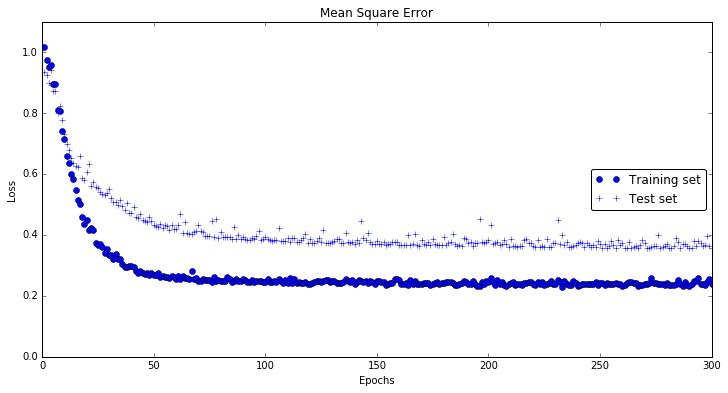

In [99]:
history_dict = hist.history

import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12,6))
plt.plot(epochs, loss_values, 'bo', label = "Training set")
plt.plot(epochs, val_loss_values, 'b+', label = "Test set")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="center right", fancybox= True)
plt.title("Mean Square Error")
plt.ylim(0)

plt.show()

En este gráfico se puede ver como se comporta el error de entrenamiento y de pruebas (*MSE*), teniendo un declive bastante fuerte en las primeras repeticiones, disminuyendo su error desde un 100% hasta un 30% en las 50 repeticiones (*epoch*), donde se puede ver que el error ya no disminuye en gran medida, es decir, en este punto lo más probable es que se encuentre en un óptimo local, ya que el algoritmo de optimización se encuentra *estancado* en este error sin poder disminuirlo, por lo que el algoritmo convergue a las 50 *epoch* aproximadamente.  

En este gráfico tambien se aprecia el fenómeno de *overfitting* ya que el error de entrenamiento es mas bajo que el error de prueba y este no mejora al pasar las iteraciones sobre el algoritmo, por lo que se tiene este modelo ajustado sobre el conjunto de entrenamiento, menor error que el de pruebas. Por lo que la red neuronal no generaliza a la hora de predecir sobre un valor de prueba.  
Repitiendo el experimento se encontró que cambian algunos valores de errores pero se mantiene la misma tendencia del algoritmo, a converger a las 50 *epoch*.

### d) ReLu

In [214]:
def relu_3capas():
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    return model

model = relu_3capas()
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

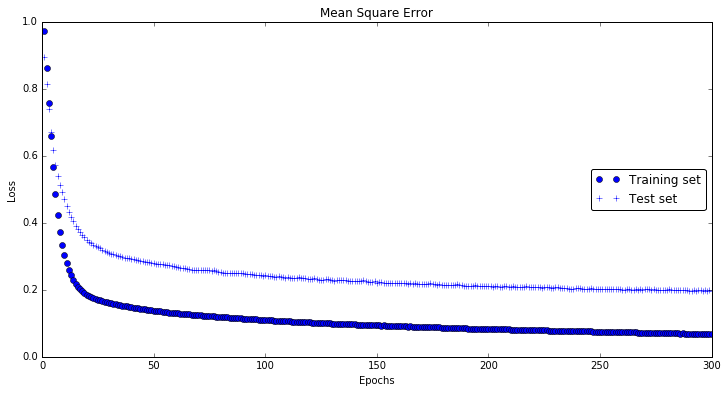

In [215]:
history_dict = hist.history

import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12,6))
plt.plot(epochs, loss_values, 'bo', label = "Training set")
plt.plot(epochs, val_loss_values, 'b+', label = "Test set")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="center right", fancybox= True)
plt.title("Mean Square Error")
plt.ylim(0)

plt.show()

En este gráfico se puede apreciar una rápida convergencia en los primeros epochs y a una estabilidad de los errores (MSE), esto se debe a que el tipo de problema es de regresión lineal, ya que el precio de la casa vive en un dominio continuo y es una combinación lineal de los atributos, al igual que la función de activación es lineal.

En el otro gráfico con la función de activación sigmoidal, tanto en el conjunto de entrenamiento y de test, por cada epoch hay una cota de incertidumbre en los errores en relación a la tendencia que estos siguen, es decir estos varían alrededor de la tendencia. No así en este gráfico, ya que los errores siguen una tendencia clara y casi continua por la naturaleza de la función de activación.

Empíricamente, se observan bajas notables en los errores.En el conjunto de entrenamiento en la 50 iteración de un 100% baja a un 15% en comparación al 30% de la sigmoidal. En el conjunto de prueba de un 100% pasó a 30% en comparación a un 40% con la función de activación sigmoidal. A pesar de la mejora, con esta función persiste el fenómeno de overfitting.  
Entonces, por convergencia, disminución de los errores y por la naturaleza del problema, la función de activación relu es más efectiva que la función de activación sigmoidal. 


### e) Variar *learning rate*

In [178]:
#funcion para graficar

def graficar_historial(hist1,hist2):
    history_dict1 = hist1.history
    history_dict2 = hist2.history
    
    loss_values1 = history_dict1['loss']
    val_loss_values1 = history_dict1['val_loss']
    epochs1 = range(1, len(loss_values1) + 1)
    
    loss_values2 = history_dict2['loss']
    val_loss_values2 = history_dict2['val_loss']
    epochs2 = range(1, len(loss_values2) + 1)


    f, axarr = plt.subplots(1, 2, figsize=(14,5) )
    colors = ['#0B9014','#D20BD2']*4
    axarr[0].plot(epochs1, loss_values1, 'bo', label = "Training set")
    axarr[0].plot(epochs1, val_loss_values1, 'b+', label = "Test set")
    axarr[0].set_title('Error de Arquitectura Sigmoidal')
    axarr[0].set_ylim(0)
    axarr[0].set_xlabel('Epochs')
    axarr[0].set_ylabel('Loss')
    axarr[0].legend(loc="center right", fancybox= True)

    axarr[1].plot(epochs2, loss_values2, 'bo', label = "Training set")
    axarr[1].plot(epochs2, val_loss_values2, 'b+', label = "Test set")
    axarr[1].set_title('Error de Arquitectura ReLu')
    axarr[1].set_ylim(0)
    axarr[1].set_xlabel('Epochs')
    axarr[1].set_ylabel('Loss')
    axarr[1].legend(loc="center right", fancybox= True)

    f.tight_layout() #separar los subplot
    plt.show()

Para Learning rate = 0.0001


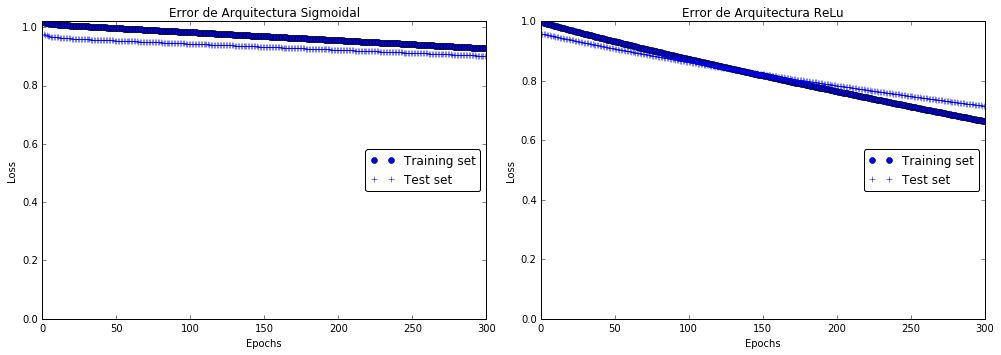

Para Learning rate = 0.005


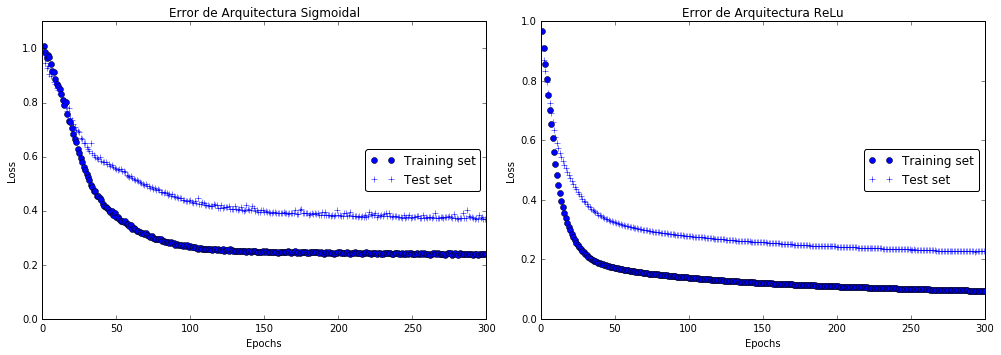

Para Learning rate = 0.02


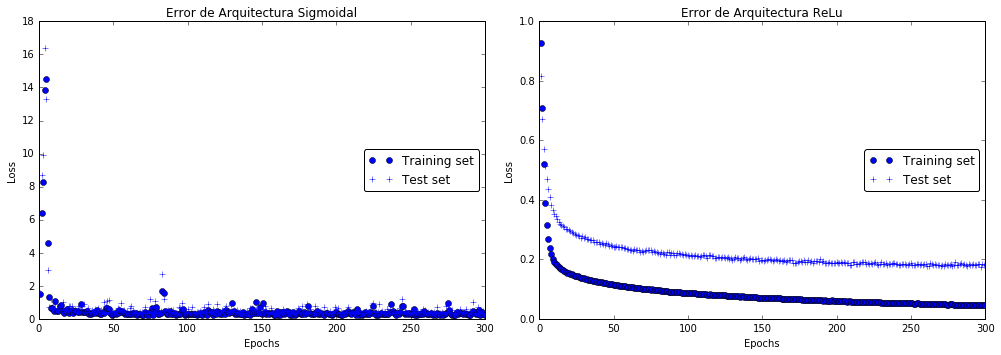

Para Learning rate = 0.2


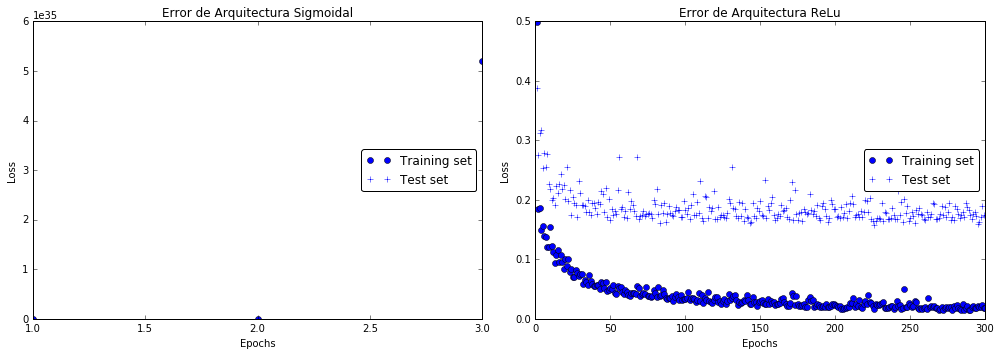

In [188]:
import numpy as np
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)

def variar_learn(learn):
    #Sigmoidal
    model = sigmoidal_3capas()
    sgd = SGD(lr=learn)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))


    #Relu
    model = relu_3capas()
    sgd = SGD(lr=learn)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    graficar_historial(hist1,hist2)


#casos representativos
print "Para Learning rate = 0.0001"
variar_learn(0.0001)
print "Para Learning rate = 0.005"
variar_learn(0.005)
print "Para Learning rate = 0.02"
variar_learn(0.02)
print "Para Learning rate = 0.2"
variar_learn(0.2)

#for i in lear_rate:
#   print i
#  variar_learn(i)

Los gráficos anteriores muestran la gran sensibilidad del algoritmo optimizador en torno al hiperparámetro *learning rate*, esto se muestra ya que con un valor bajo el algoritmo se demora mucho en converger y llegar a un óptimo local, como se puede apreciar en el gráfico de *learning rate* 0.001 donde en 300 *epochs* no disminuye del 80% de error para **sigmoidal**y 60% para **relu**, ya que la tasa de aprendizaje del algoritmo es baja, este explora el espacio de búsqueda muy lentamente en la dirección del gradiente, demorándose en encontrar algún óptimo.  
Con *learning rate* de 0.005 se comporta mejor que con 0.001 ya que se acerca a un error bajo de una manera más rapida debido a que le entrega un mayor porcentaje a la intensidad del gradiente. En este gráfico se visualiza que converge más lento que con una tasa de 0.01.  

Para esto se ve que relu gana...

Por otro lado cuando la tasa de aprendizaje eleva su valor, el método de gradiende descendente estocástico diverge, como se puede apreciar en la siguiente línea de código.

In [201]:
print "Sigmoidal Learning rate = 0.05"
model = sigmoidal_3capas()
sgd = SGD(lr=0.05)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=4,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

print "ReLu Learning rate = 0.5"
model = relu_3capas()
sgd = SGD(lr=0.5)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=4,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

Sigmoidal Learning rate = 0.05
Train on 379 samples, validate on 127 samples
Epoch 1/4
379/379 [==============================] - 0s - loss: 35425307402.4632 - val_loss: 7573102698818.5195
Epoch 2/4
379/379 [==============================] - 0s - loss: 10914376267192147640320.0000 - val_loss: 1181398460945506544648192.0000
Epoch 3/4
379/379 [==============================] - 0s - loss: 1171013708572380679758127285927936.0000 - val_loss: 88434425792742180707161156731535360.0000
Epoch 4/4
379/379 [==============================] - 0s - loss: nan - val_loss: nan                           
ReLu Learning rate = 0.05
Train on 379 samples, validate on 127 samples
Epoch 1/4
379/379 [==============================] - 0s - loss: 4415084.2968 - val_loss: 1749733556954144641646592.0000
Epoch 2/4
379/379 [==============================] - 0s - loss: nan - val_loss: nan                
Epoch 3/4
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/4
379/379 [============

Se puede ver que con 4 *epochs* el algoritmo ya diverge, con distintas tasas de aprendizaje para las distintas arquitecturas, teniendo valores de función de pérdida bastante altos en aumento. Con esto se tiene que el umbral de la tasa de aprendizaje para sigmoidal es de 0.05 y para la arquitectura con relu es de 0.5.  
Con este análisis se concluye que la tasa de aprendizaje debe ser baja para obtener un resultado óptimo, con la posibilidad de que si es muy baja el algoritmo se tardará mucho en obtener un resultado óptimo. Con valores altos de tasa de aprendizaje la aleatoridad juega un papel más importante.

### f) Validación cruzada

In [155]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()


def C_V(Xm,ym,K, tipo):
    kfold = cross_validation.KFold(len(Xm), K)
    cvscores = []
    for i, (train, val) in enumerate(kfold):
        # create model
        if tipo == "relu":
            model = relu_3capas()
        elif tipo == "sigmoidal":
            model = sigmoidal_3capas()
            
        # Compile model
        sgd = SGD(lr=0.01)
        model.compile(optimizer=sgd,loss='mean_squared_error')
        # Fit the model
        model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
        # evaluate the model
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    return mse_cv

print "\nEstimacion del error con 5 folds (arquitectura Sigmoidal) %f"%C_V(Xm,ym,5,"sigmoidal")
print "\nEstimacion del error con 5 folds (arquitectura ReLu) %f"%C_V(Xm,ym,5,"relu")

print "\nEstimacion del error con 10 folds (arquitectura Sigmoidal) %f"%C_V(Xm,ym,10,"sigmoidal")
print "\nEstimacion del error con 10 folds (arquitectura ReLu) %f"%C_V(Xm,ym,10,"relu")

32/75 [===========>..................] - ETA: 0s
Estimacion del error con 5 folds (arquitectura Sigmoidal) 0.270039
32/75 [===========>..................] - ETA: 0s
Estimacion del error con 5 folds (arquitectura ReLu) 0.149370
32/37 [========================>.....] - ETA: 0s
Estimacion del error con 10 folds (arquitectura Sigmoidal) 0.289682
32/37 [========================>.....] - ETA: 0s
Estimacion del error con 10 folds (arquitectura ReLu) 0.147322


En la celda anterior se presentan los errores de validación con 5 folds y con 10 folds. A continuación se presenta el error real sobre el conjunto de pruebas.

In [151]:
model = sigmoidal_3capas()
            
# Compile model
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura Sigmoidal) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())
        
model = relu_3capas()

# Compile model
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura ReLu) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())

 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.355650
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura ReLu) 0.194937


Se puede ver en este caso que, para las dos arquitecturas de redes neuronales creadas, el error sobre el conjunto de pruebas (*error real*) es mayor que la estimación del error realizada por *cross validation* para los distintos números de fold (5 y 10), es decir, los valores de la estimación por *cross validation* nos dicen que el modelo posee un menor error del que verdaderamente posee, por lo que sobreestima el comportamiento del modelo sobre la data futura.  
Para el caso de probar una validación cruzada con 10 folds el tiempo de ejecución es mayor que para 5 folds, esto es ya que son 10 modelos los que se deben ajustar y predecir los errores, comparado con 5 de la validación con 5 folds. Aunque la validación con 10 folds se acerca más al valor real del error, cabe decir que como el algoritmo optimizador es estocástico los valores pueden ir cambiando si se repite el experimento, pero el comportamiento que más se repite es el descrito anteriormente. 

### g) *progressive decay*

Para learning rate inicial de 0.02 para Sigmoidal y 0.2 para ReLu
Decay = 0.000001


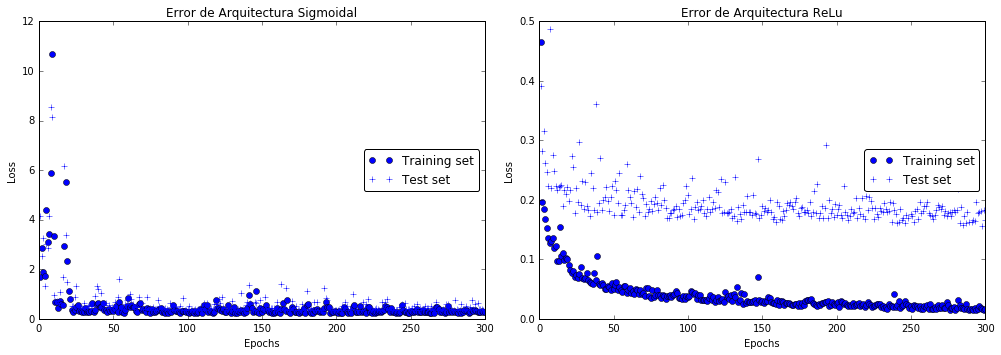

Decay = 0.000005


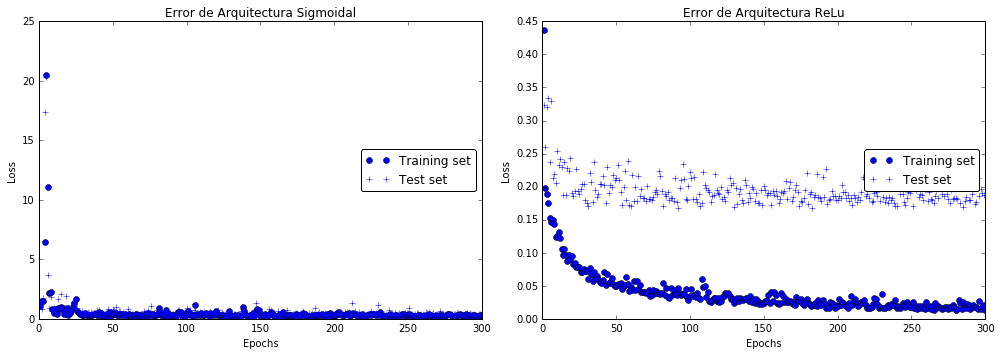

Decay = 0.000022


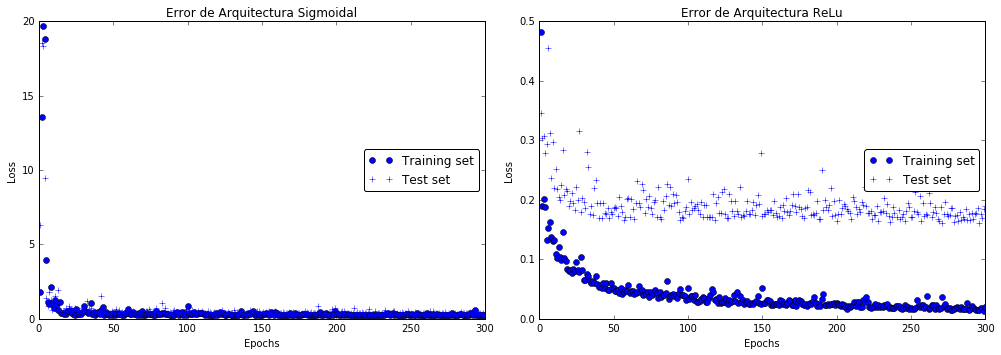

Decay = 0.000100


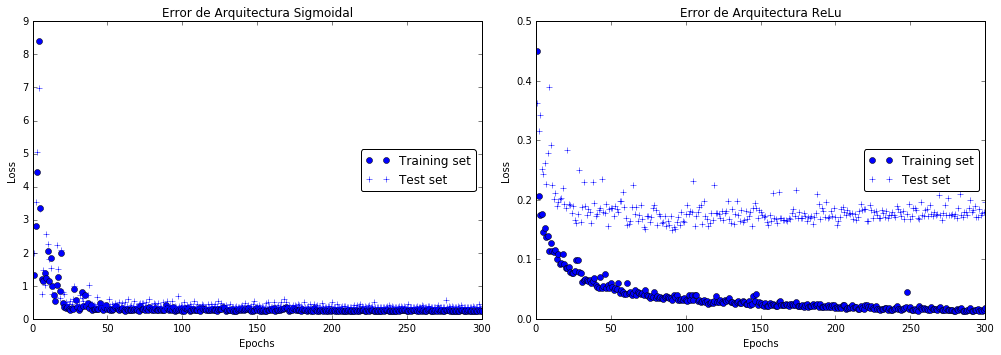

Decay = 0.000464


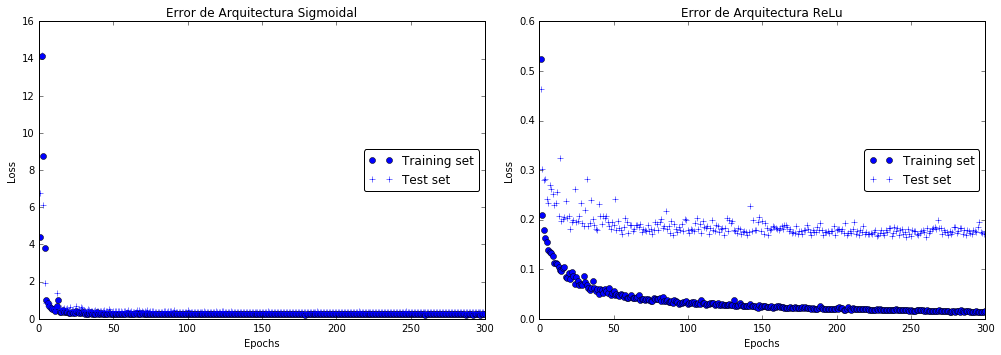

Decay = 0.002154


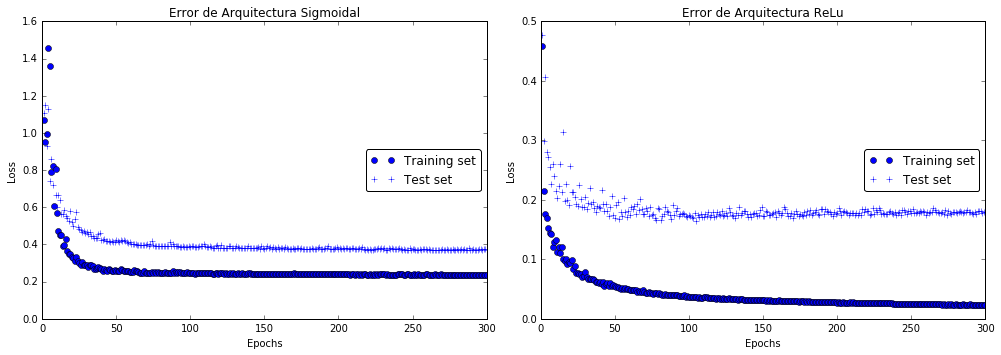

Decay = 0.010000


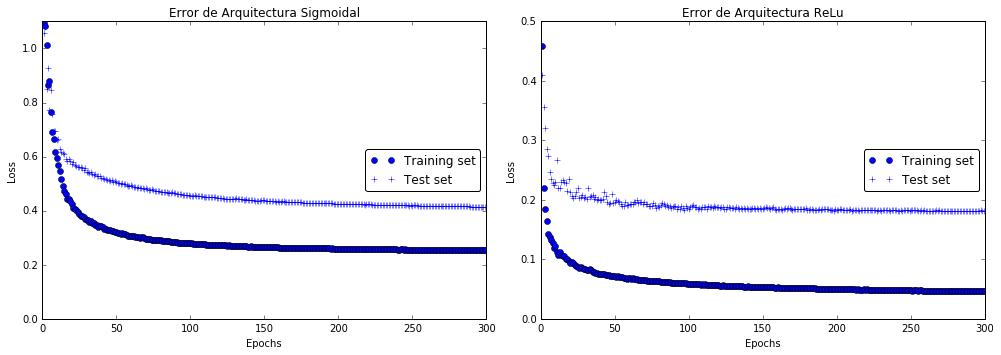

Decay = 0.046416


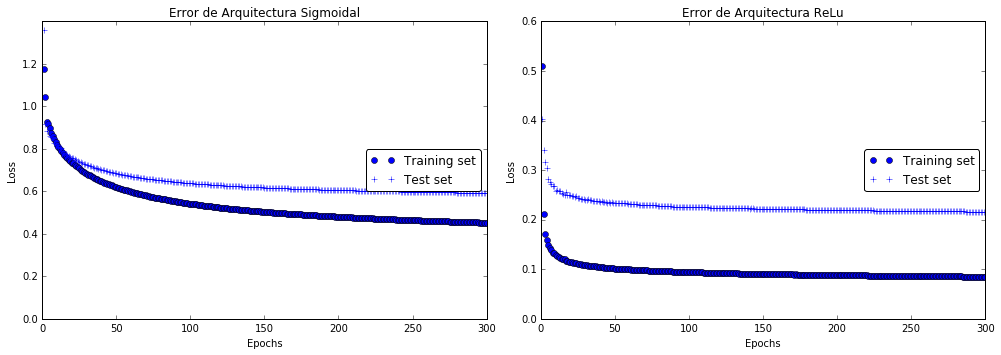

Decay = 0.215443


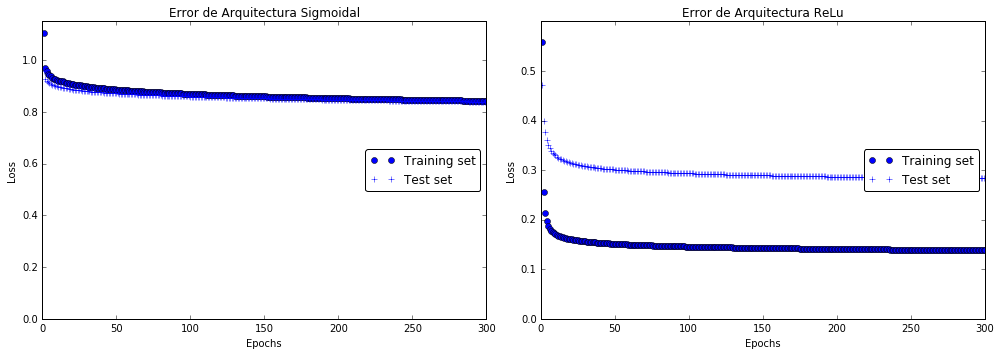

Decay = 1.000000


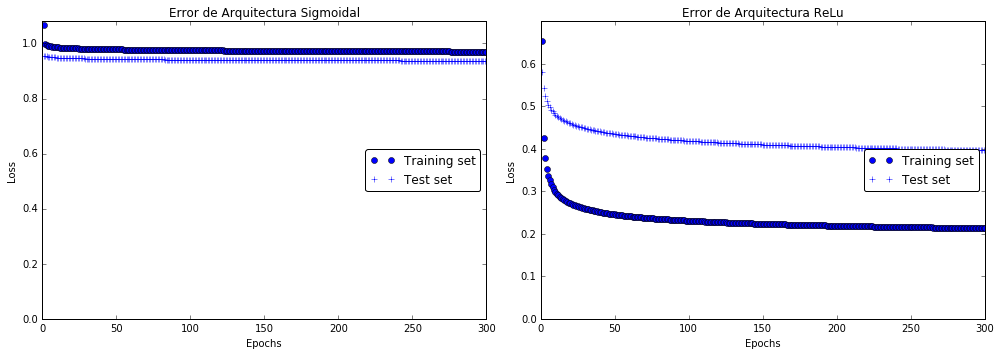

In [217]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)

print "Para learning rate inicial de 0.02 para Sigmoidal y 0.2 para ReLu"
for i in lear_decay:
    
    print "Decay = %f"%i
    
    model = sigmoidal_3capas()
    sgd = SGD(lr=0.02, decay=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    model = relu_3capas()
    sgd = SGD(lr=0.2, decay=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    graficar_historial(hist1,hist2)

analisis...

### h) momentum

Para learning rate inicial 0.2 para Relu y 0.01 para Sigmoidal
momentum de la iteracion = 0.000000


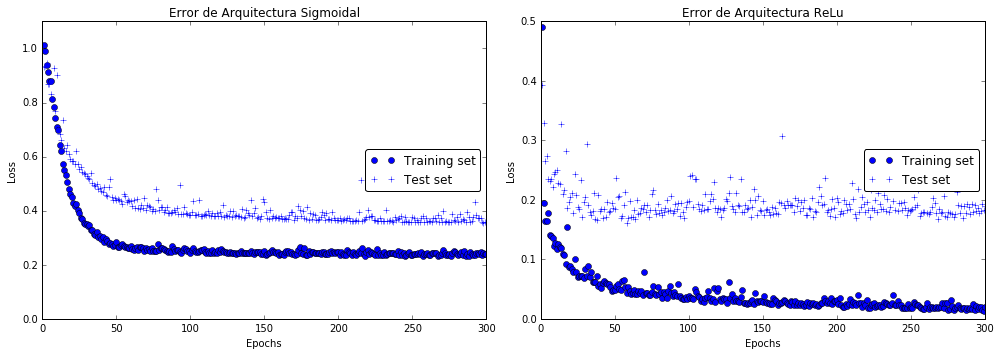

momentum de la iteracion = 0.050000


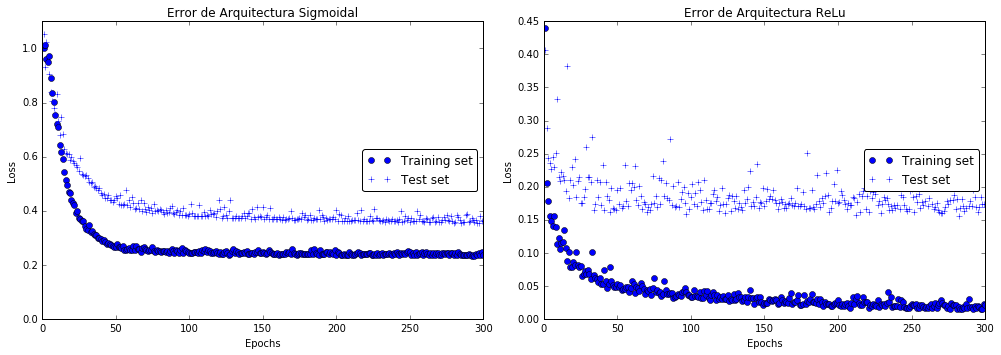

momentum de la iteracion = 0.100000


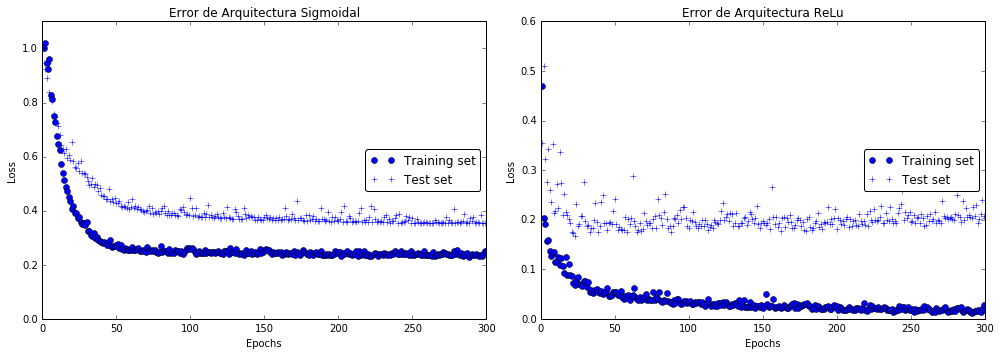

momentum de la iteracion = 0.150000


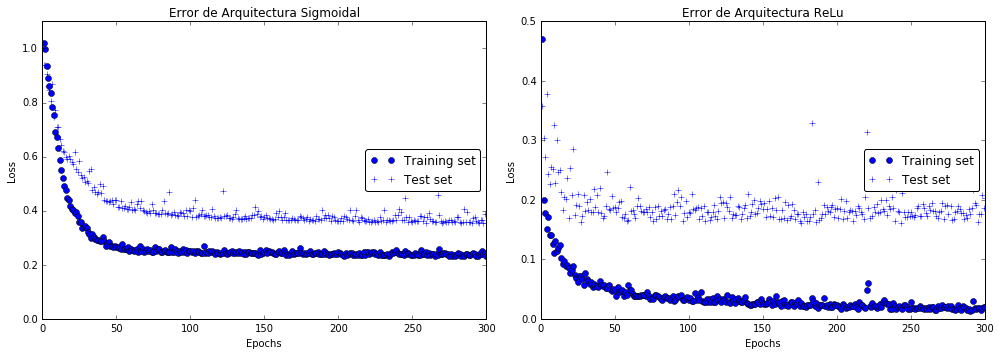

momentum de la iteracion = 0.200000


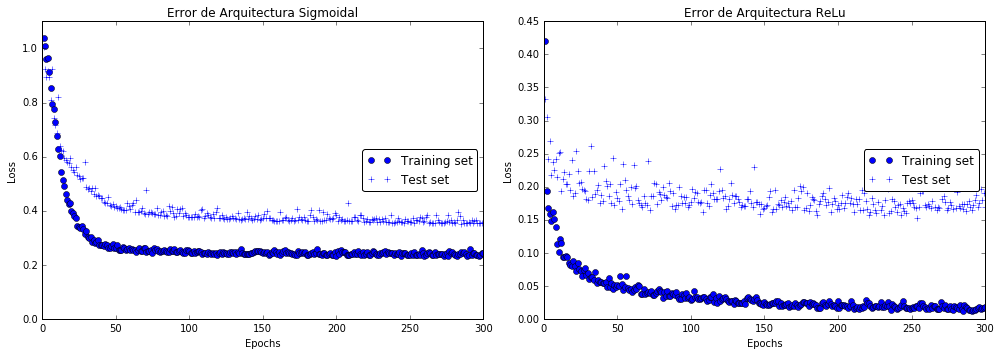

momentum de la iteracion = 0.250000


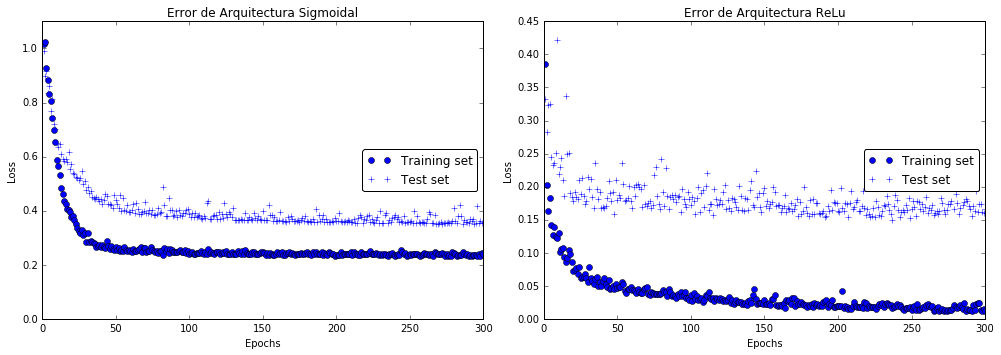

momentum de la iteracion = 0.300000


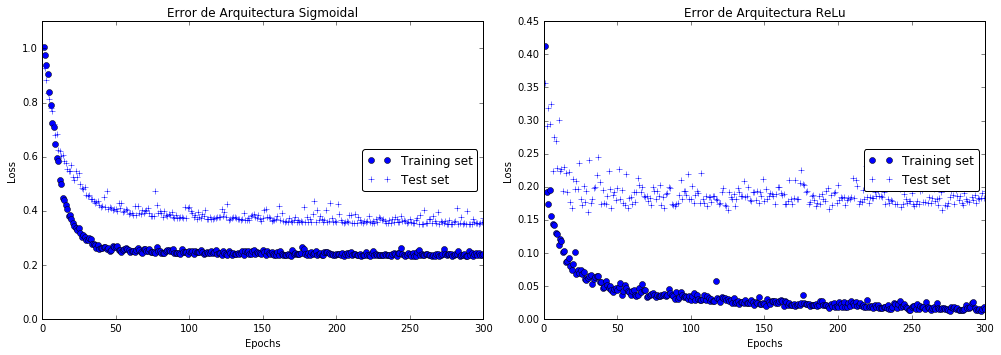

momentum de la iteracion = 0.350000


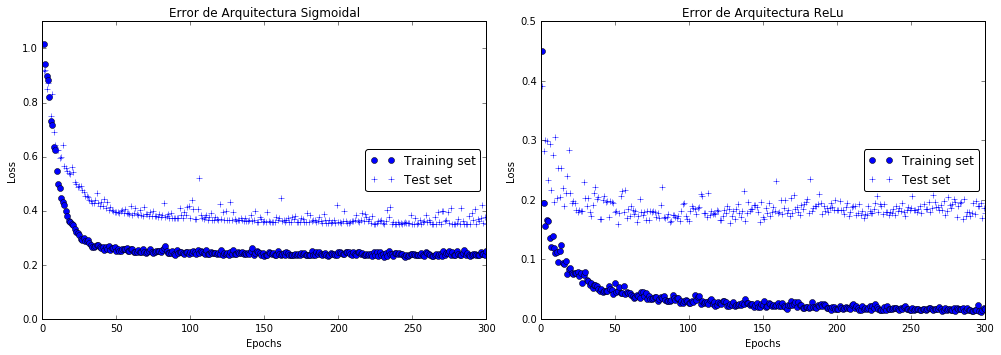

momentum de la iteracion = 0.400000


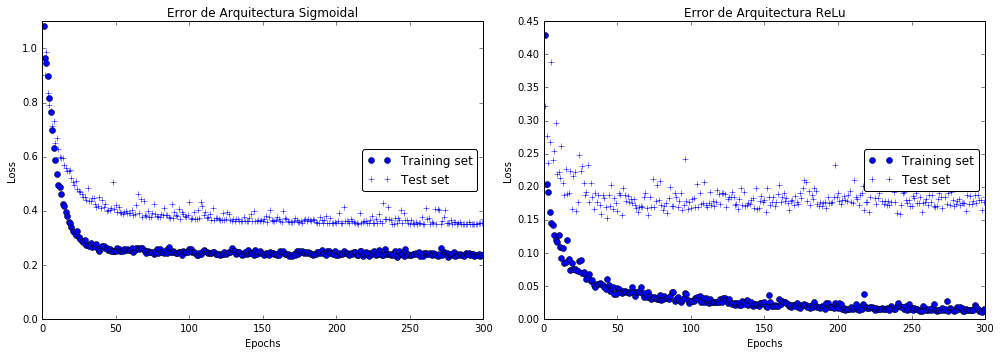

momentum de la iteracion = 0.450000


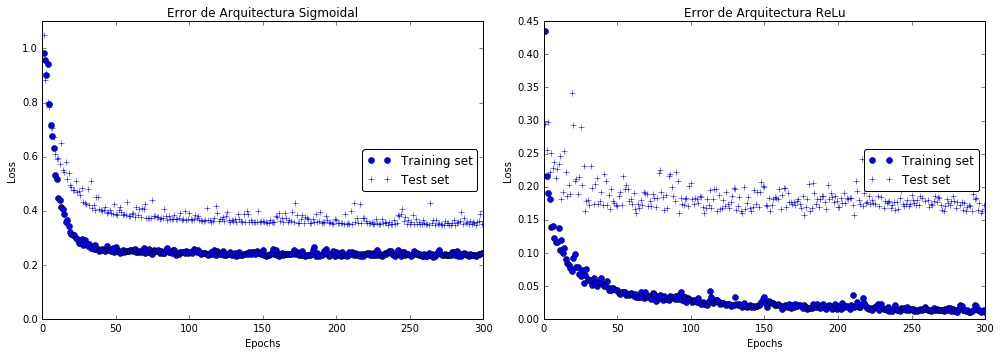

momentum de la iteracion = 0.500000


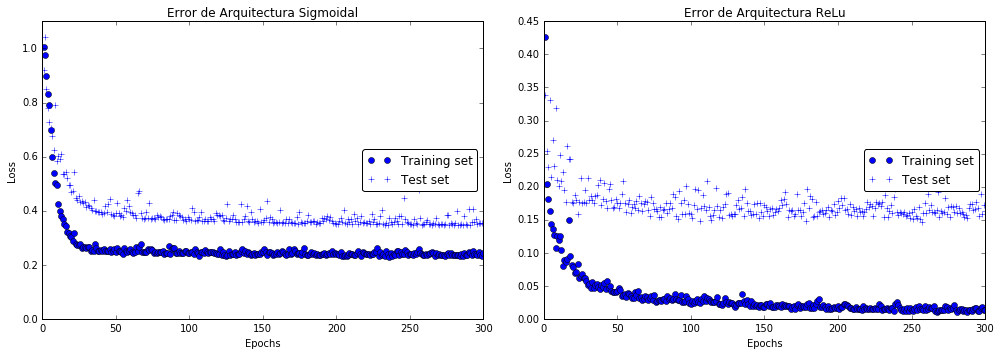

momentum de la iteracion = 0.550000


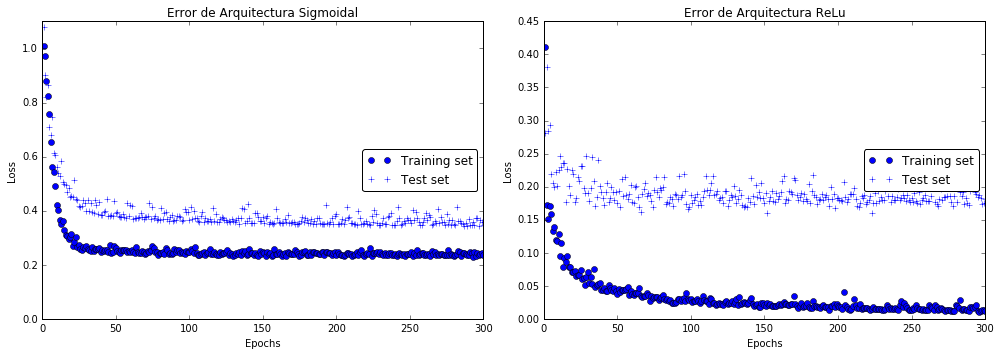

momentum de la iteracion = 0.600000


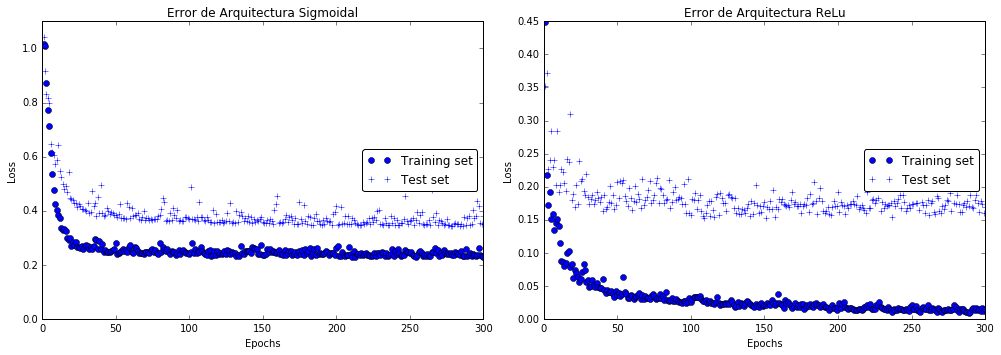

momentum de la iteracion = 0.650000


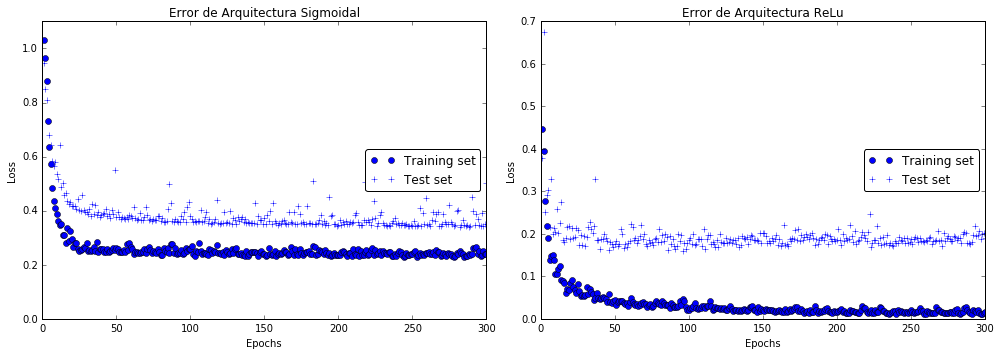

momentum de la iteracion = 0.700000


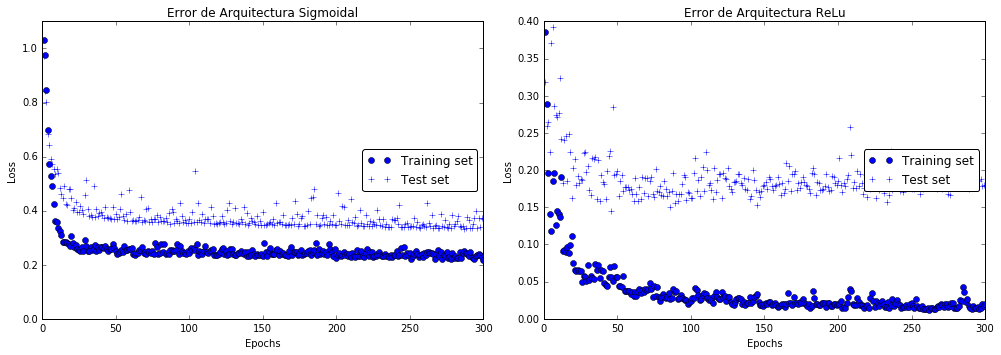

momentum de la iteracion = 0.750000


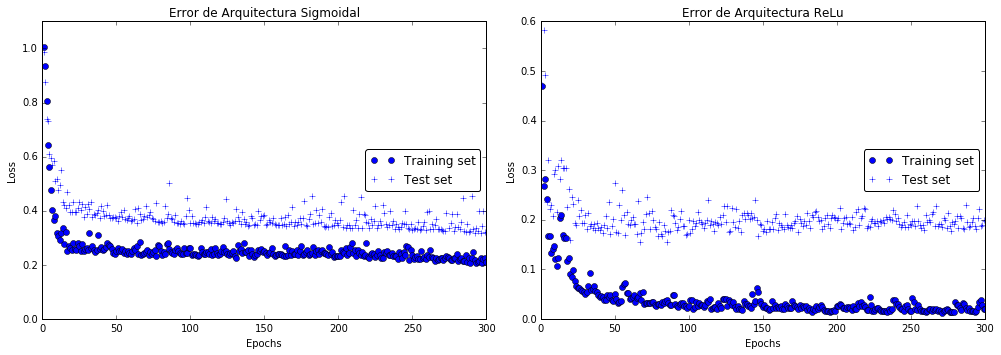

momentum de la iteracion = 0.800000


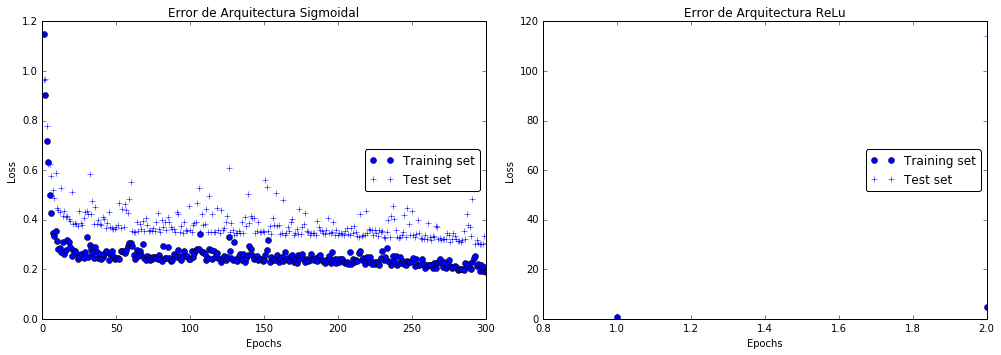

momentum de la iteracion = 0.850000


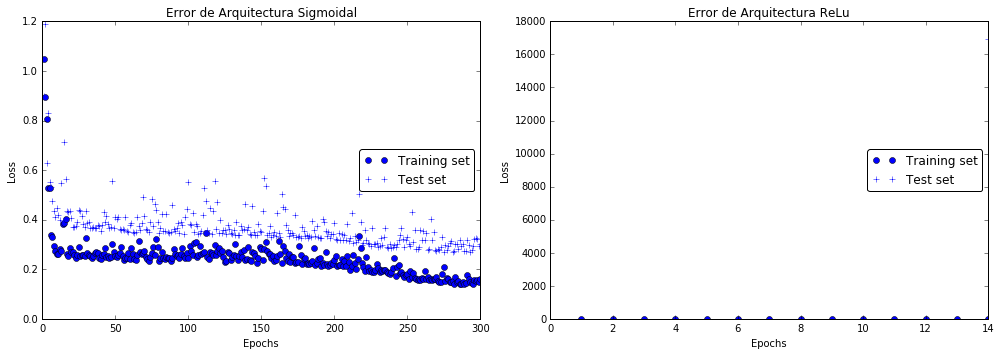

momentum de la iteracion = 0.900000


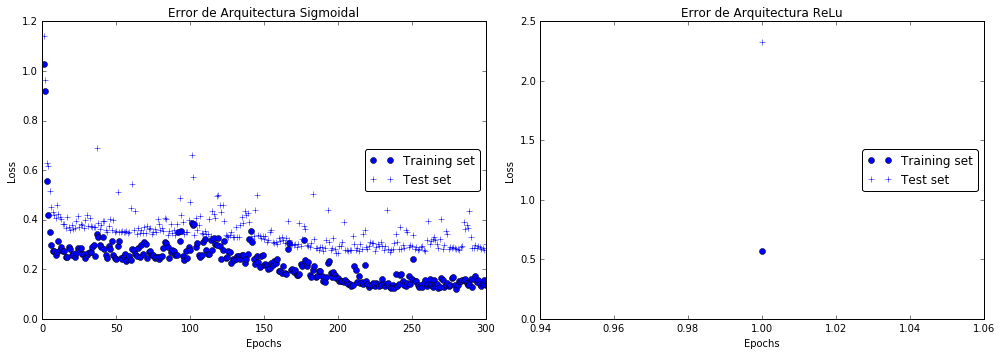

momentum de la iteracion = 0.950000


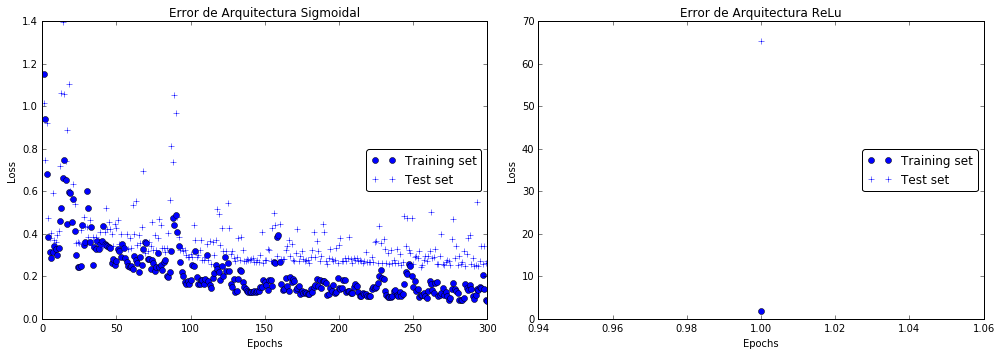

momentum de la iteracion = 1.000000


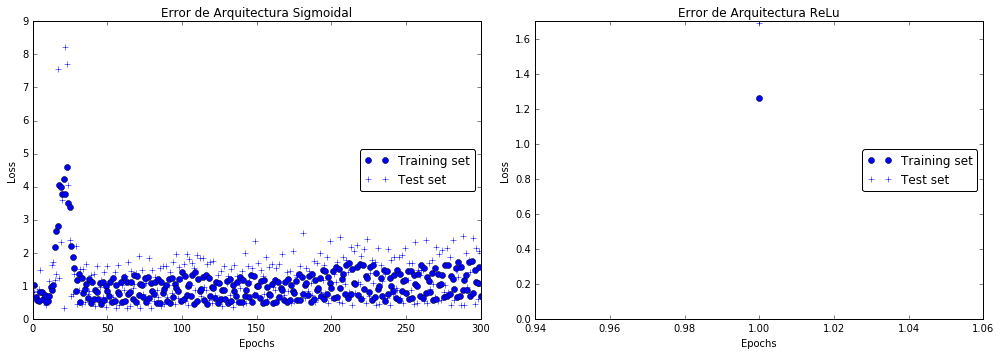

In [216]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)

print "Para learning rate inicial 0.2 para Relu y 0.01 para Sigmoidal"
for i in momentum:
    
    print "momentum de la iteracion = %f"%i
    
    model = sigmoidal_3capas()
    sgd = SGD(lr=0.01,momentum=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    model = relu_3capas()
    sgd = SGD(lr=0.2, momentum=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    graficar_historial(hist1,hist2)

### momentum Nesterov

Para learning rate inicial 0.2 para Relu y 0.01 para Sigmoidal
momentum de la iteracion = 0.000000


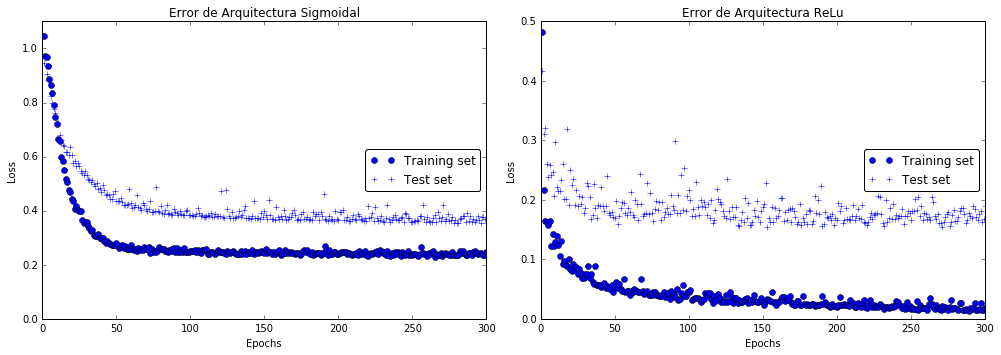

momentum de la iteracion = 0.111111


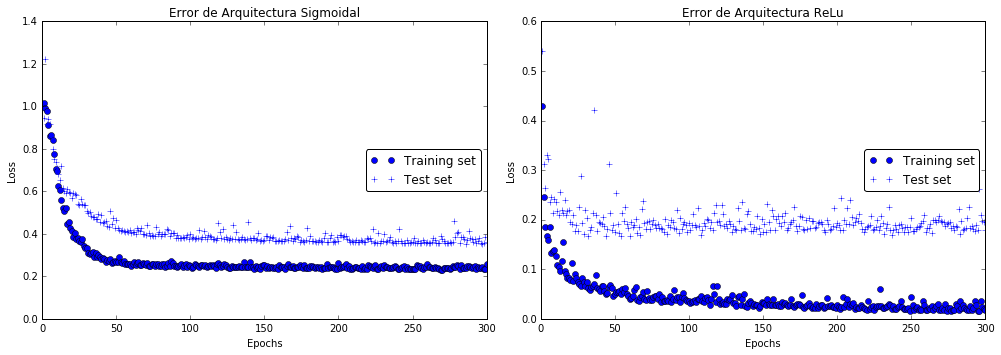

momentum de la iteracion = 0.222222


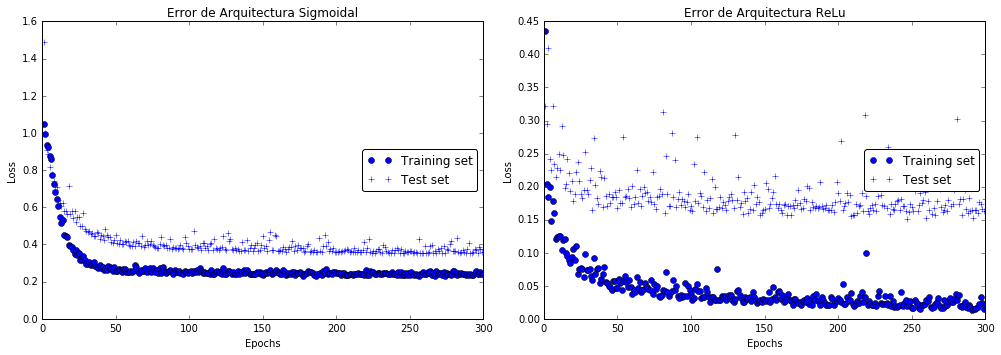

momentum de la iteracion = 0.333333


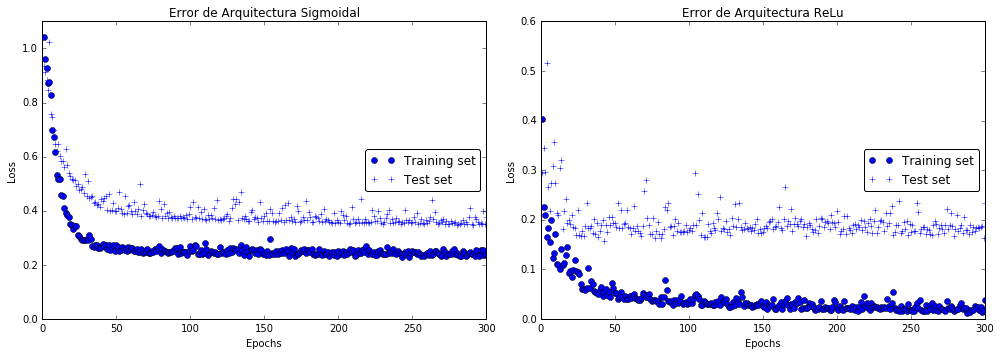

momentum de la iteracion = 0.444444


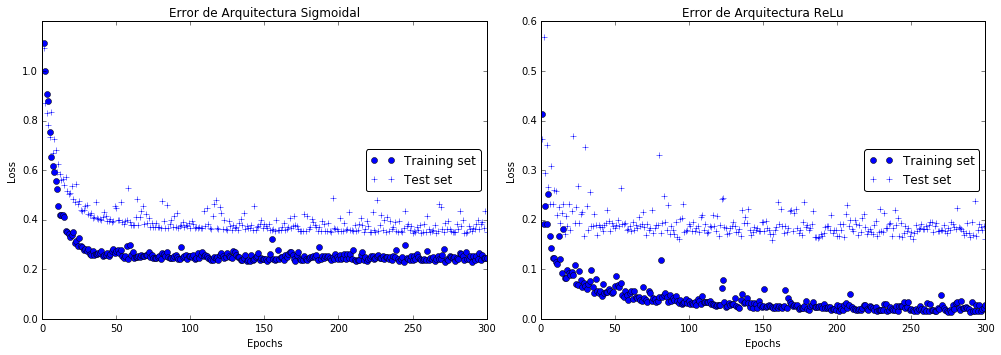

momentum de la iteracion = 0.555556


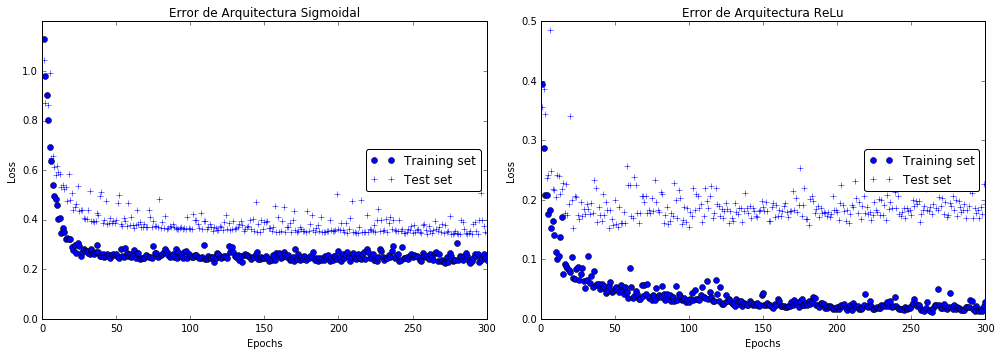

momentum de la iteracion = 0.666667


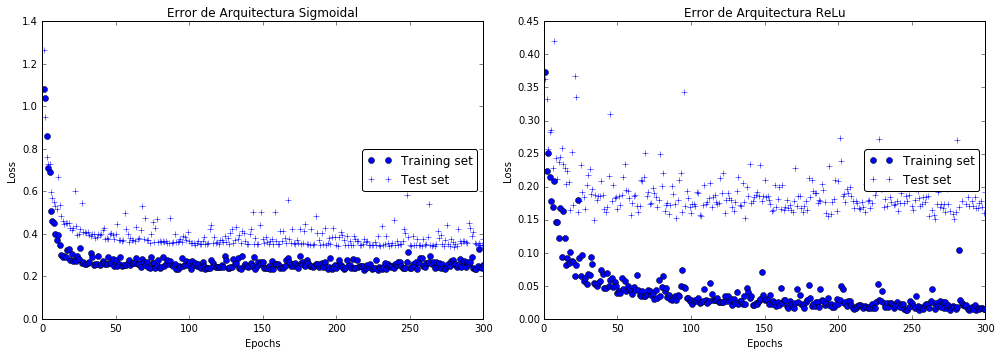

momentum de la iteracion = 0.777778


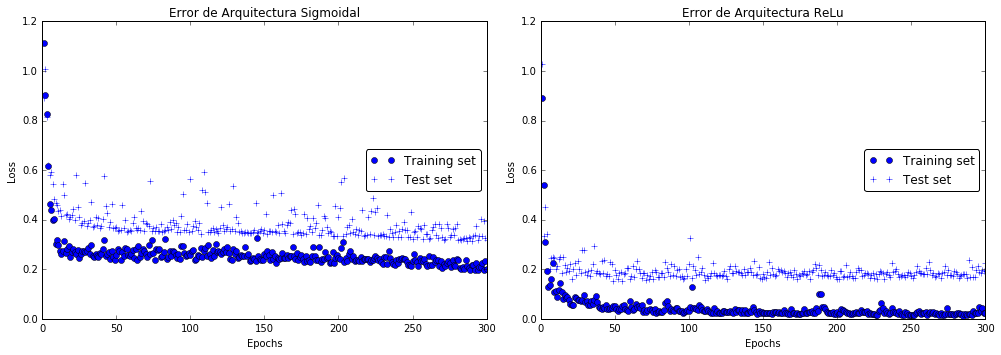

momentum de la iteracion = 0.888889


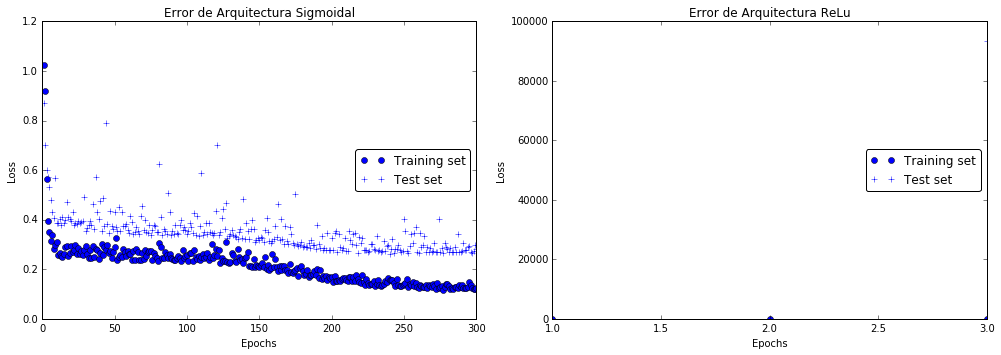

momentum de la iteracion = 1.000000


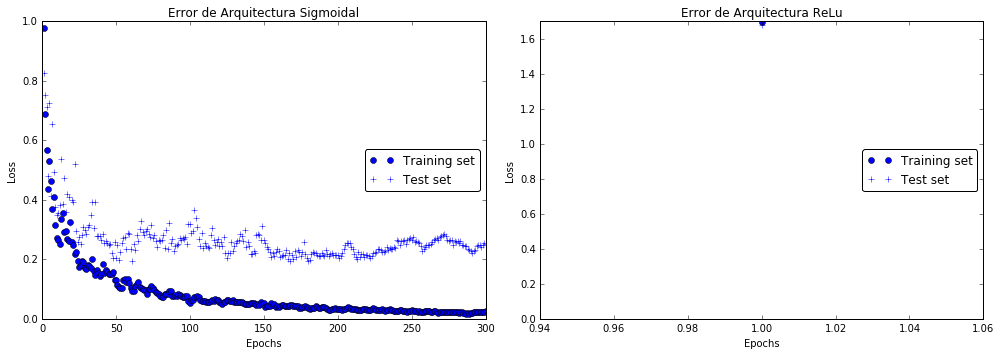

In [221]:
n_decay = 10
momentum = np.linspace(0,1,n_decay)

print "Para learning rate inicial 0.2 para Relu y 0.01 para Sigmoidal"
for i in momentum:
    
    print "momentum de la iteracion = %f"%i
    
    model = sigmoidal_3capas()
    sgd = SGD(lr=0.01,momentum=i,nesterov=True)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    model = relu_3capas()
    sgd = SGD(lr=0.2, momentum=i,nesterov=True)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    graficar_historial(hist1,hist2)

analisis...

### i) Mini Batches

[10, 51, 92, 133, 174, 215, 256, 297, 338, 379]
Para learning rate inicial 0.01 para Sigmoidal y 0.2 para Relu
batch size = 10


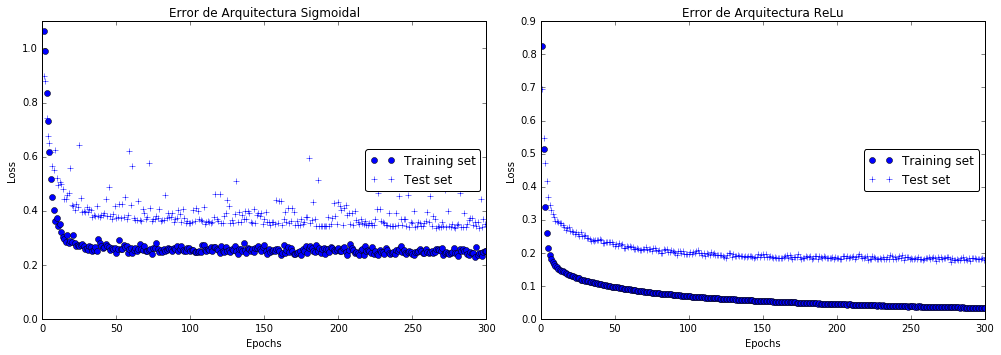

batch size = 51


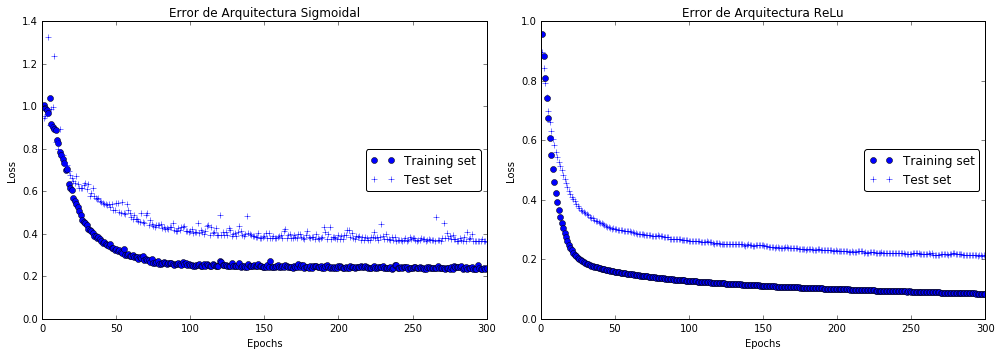

batch size = 92


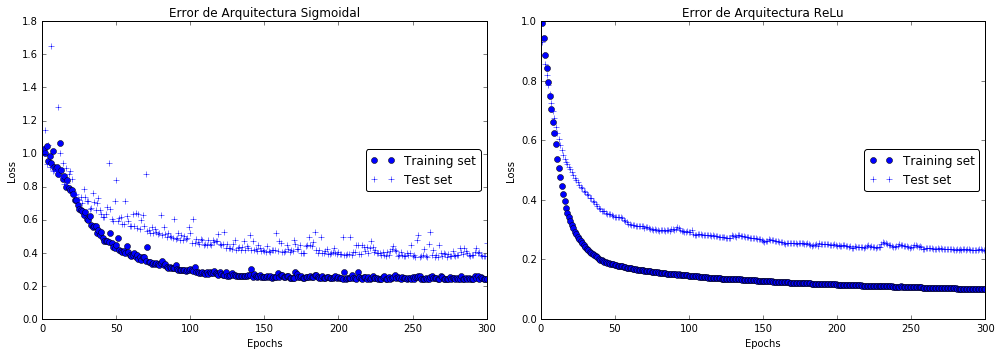

batch size = 133


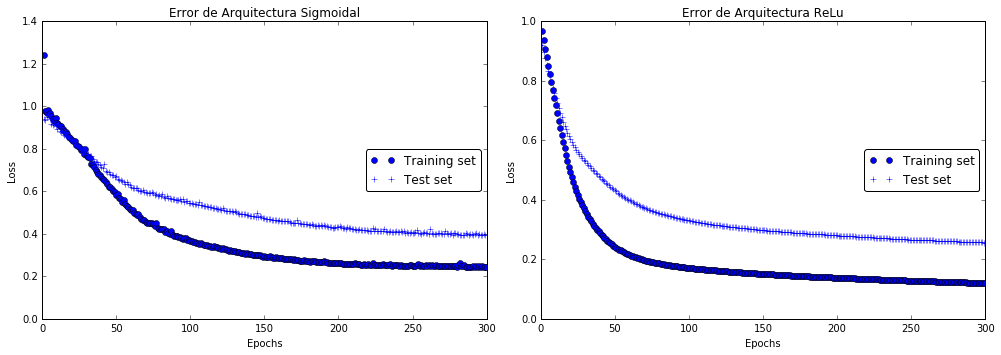

batch size = 174


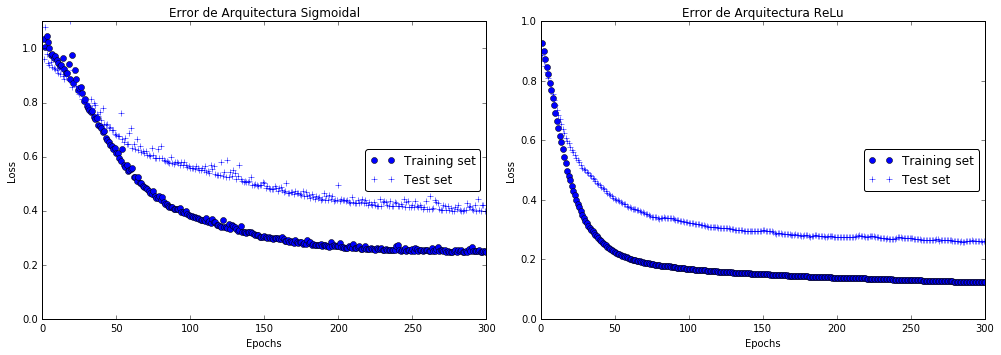

batch size = 215


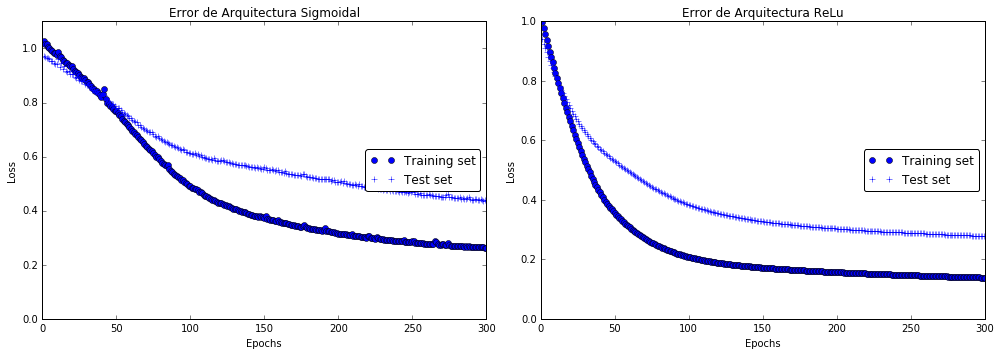

batch size = 256


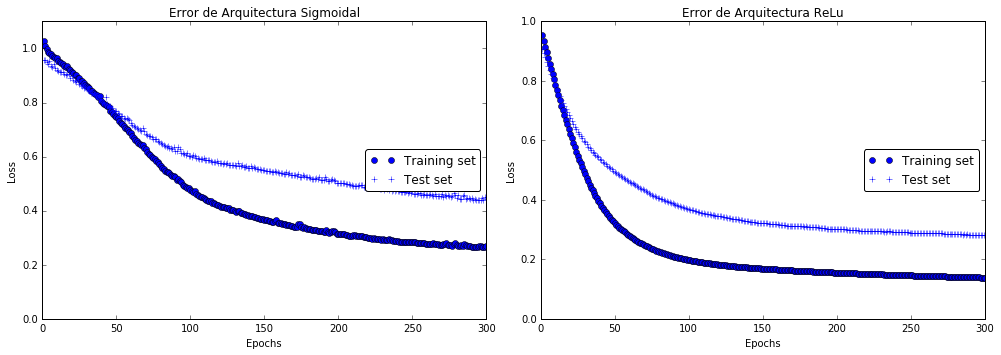

batch size = 297


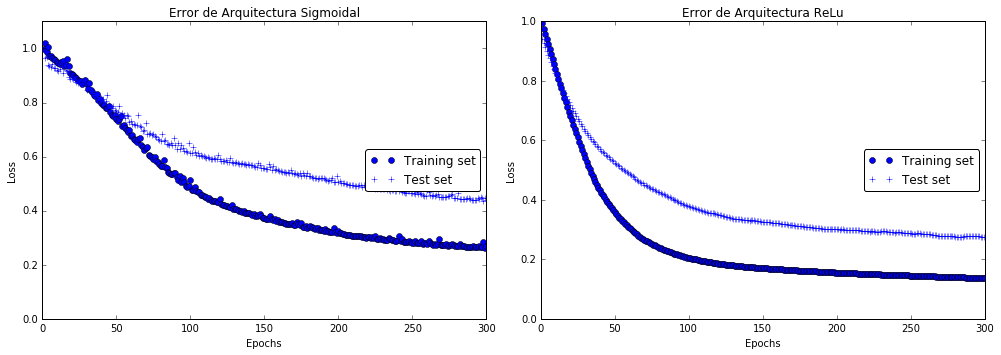

batch size = 338


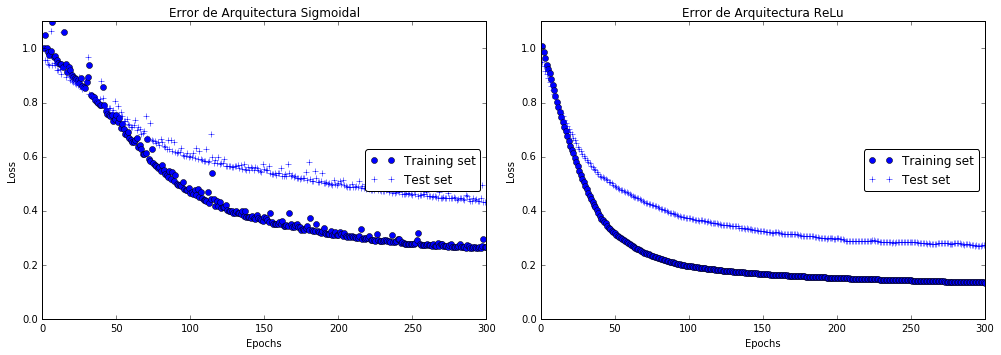

batch size = 379


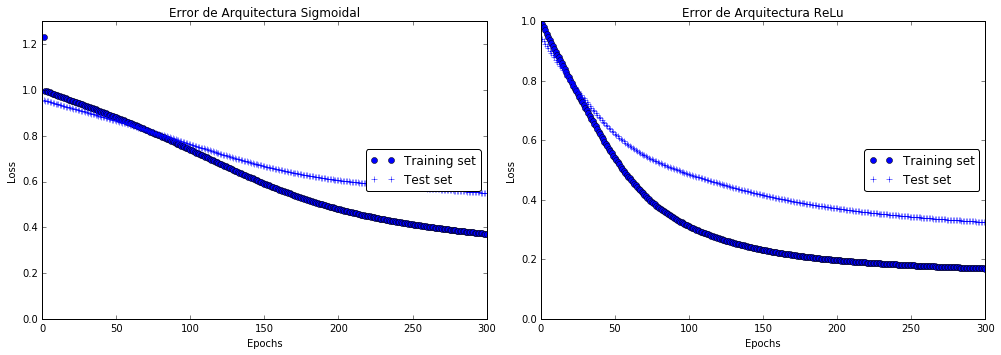

In [230]:
n_batches = 10
batch_sizes = map(int, np.round(np.linspace(10,X_train_scaled.shape[0],n_batches)))

print batch_sizes

print "Para learning rate inicial 0.01 para Sigmoidal y 0.2 para Relu"
for i in batch_sizes:
    
    print "batch size = %d"%i
    
    model = sigmoidal_3capas()
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, batch_size = i,  validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    model = relu_3capas()
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, batch_size = i,  validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    graficar_historial(hist1,hist2)
#model.fit(X_train_scaled.as_matrix(),y_train_scaled.as_matrix(),batch_size=50,nb_epoch=300)

analisis

### j) Optimizadores modernos

In [242]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

optimizadores = [SGD(lr=0.01),Adam(lr=0.01),RMSprop(lr=0.01),Adagrad(lr=0.01),Adadelta(lr=0.01)]
nombres = ["SGD", "Adam", "RMSprop","Adagrad","Adadelta"]

print "Para learning rate 0.01 para Sigmoidal y 0.01 para Relu"

historiales1 = []
historiales2 = []
for opti,nombre in zip(optimizadores,nombres):
    print "Optimizador "+nombre+"... ",
    moptimizer = opti
    
    #Sigmoidal
    model = sigmoidal_3capas()
    model.compile(optimizer=moptimizer,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), verbose =0,nb_epoch=300)
    historiales1.append(hist1)
    
    #ReLu
    model = relu_3capas()
    model.compile(optimizer=moptimizer,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(),verbose=0, nb_epoch=300)
    historiales2.append(hist2)
    print "terminado"

Para learning rate 0.01 para Sigmoidal y 0.01 para Relu
Optimizador SGD...  terminado
Optimizador Adam...  terminado
Optimizador RMSprop...  terminado
Optimizador Adagrad...  terminado
Optimizador Adadelta...  terminado


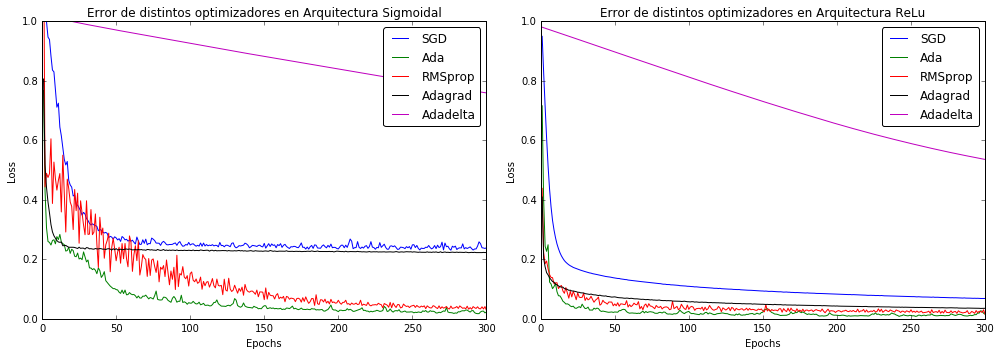

In [247]:
history_dict1 = [hist.history for hist in historiales1]
history_dict2 = [hist.history for hist in historiales2]

loss_values1 = [hist['loss'] for hist in history_dict1]
epochs1 = range(1, len(loss_values1[0]) + 1)
    
loss_values2 = [hist['loss'] for hist in history_dict2]
epochs2 = range(1, len(loss_values2[0]) + 1)

f, axarr = plt.subplots(1, 2, figsize=(14,5) )
axarr[0].plot(epochs1, loss_values1[0], 'b', label = "SGD")
axarr[0].plot(epochs1, loss_values1[1], 'g', label = "Ada")
axarr[0].plot(epochs1, loss_values1[2], 'r', label = "RMSprop")
axarr[0].plot(epochs1, loss_values1[3], 'k', label = "Adagrad")
axarr[0].plot(epochs1, loss_values1[4], 'm', label = "Adadelta")

axarr[0].set_title('Error de distintos optimizadores en Arquitectura Sigmoidal')
axarr[0].set_ylim(0,1)
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[0].legend(loc="upper right", fancybox= True)

axarr[1].plot(epochs1, loss_values2[0], 'b', label = "SGD")
axarr[1].plot(epochs1, loss_values2[1], 'g', label = "Ada")
axarr[1].plot(epochs1, loss_values2[2], 'r', label = "RMSprop")
axarr[1].plot(epochs1, loss_values2[3], 'k', label = "Adagrad")
axarr[1].plot(epochs1, loss_values2[4], 'm', label = "Adadelta")
axarr[1].set_title('Error de distintos optimizadores en Arquitectura ReLu')
axarr[1].set_ylim(0,1)
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[1].legend(loc="upper right", fancybox= True)

f.tight_layout() #separar los subplot
plt.show()

analkisis..

### k) Regularizador (*weight decay*)

In [259]:
model = sigmoidal_3capas()
            
# Compile model
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura Sigmoidal) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())
        
model = relu_3capas()

# Compile model
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura ReLu) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())

 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.353989
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura ReLu) 0.201616


In [268]:
from keras.regularizers import *
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]

print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Para la arquitectura con sigmoidal
 32/127 [======>.......................] - ETA: 0s
Error sobre Test set con regularizador l2 = 0.369625

Para la arquitectura con relu
 32/127 [======>.......................] - ETA: 0s
Error sobre Test set con regularizador l2 = 0.219578


In [267]:
print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l1 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l1 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Para la arquitectura con sigmoidal
 32/127 [======>.......................] - ETA: 0s
Error sobre Test set con regularizador l1 = 0.384207

Para la arquitectura con relu
 32/127 [======>.......................] - ETA: 0s
Error sobre Test set con regularizador l1 = 0.302715


comentar..

### Añadiendo una capa

In [277]:
from keras.regularizers import *
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]

print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(600,input_shape=(300,),init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform'))
model.add(Activation('relu'))
model.add(Dense(600,input_shape=(300,),init='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Para la arquitectura con sigmoidal
 64/127 [==============>...............] - ETA: 0s
Error sobre Test set con regularizador l2 = 0.375515

Para la arquitectura con relu
 64/127 [==============>...............] - ETA: 0s
Error sobre Test set con regularizador l2 = 0.181227


#### L2

In [278]:
from keras.regularizers import *
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]

print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(600, input_shape=(300,), init='uniform', W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(600, input_shape=(300,), init='uniform', W_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Para la arquitectura con sigmoidal
127/127 [==============================] - 0s     

Error sobre Test set con regularizador l2 = 0.401631

Para la arquitectura con relu
 64/127 [==============>...............] - ETA: 0s
Error sobre Test set con regularizador l2 = 0.201550


##### L1

In [281]:
print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(600, input_shape=(300,), init='uniform', W_regularizer=l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l1 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(600, input_shape=(300,), init='uniform', W_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l1 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Para la arquitectura con sigmoidal
127/127 [==============================] - 0s     

Error sobre Test set con regularizador l1 = 1.046206

Para la arquitectura con relu
 64/127 [==============>...............] - ETA: 0s
Error sobre Test set con regularizador l1 = 0.297931


### l) Dropout

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dropout(0.2))
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

### m)